In [3]:
# #Full dump
# dataset = Dataset(lateralize=False, reduced=False)
# dataset.preload_cache()
# dataset.save_dump()

In [5]:
# import sys
# is_colab = 'google.colab' in sys.modules

In [8]:
# dataset_reduced_half.stats()

# Dataset balanced with Findings and No Findings in equal proportion

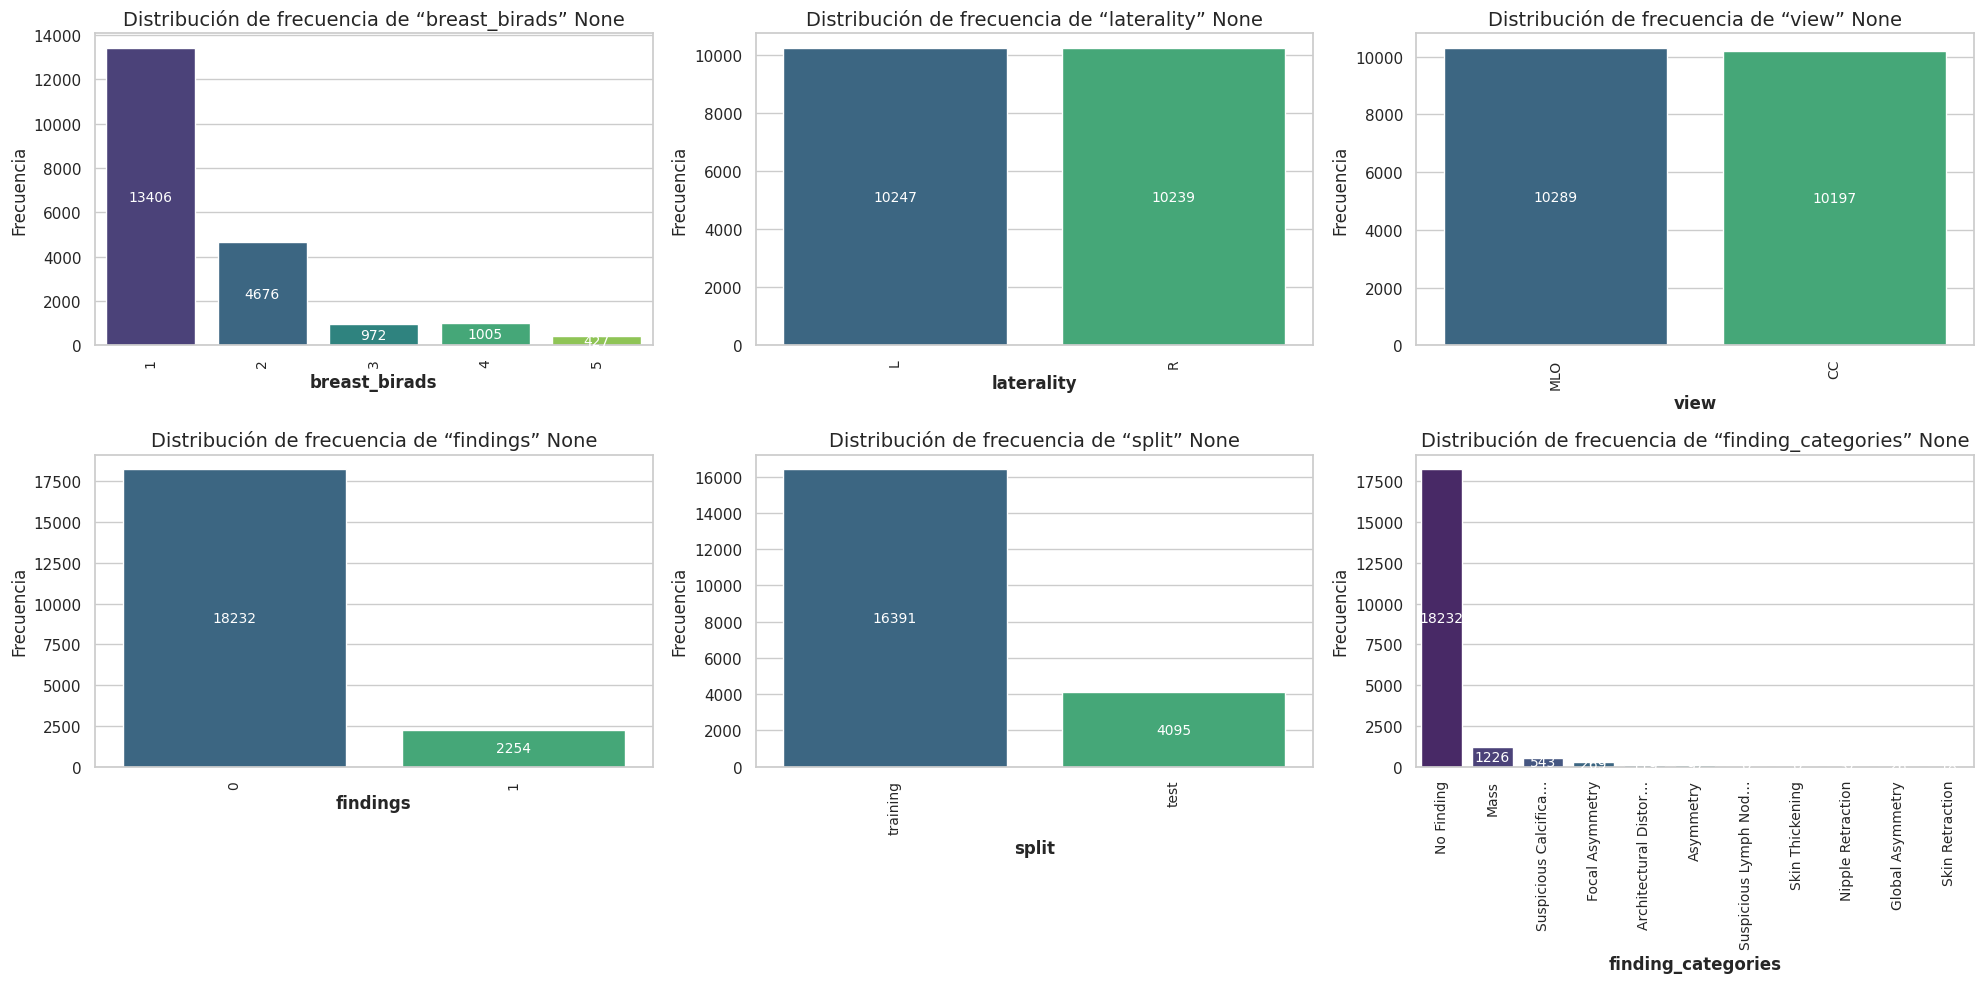

In [11]:
ds.stats()

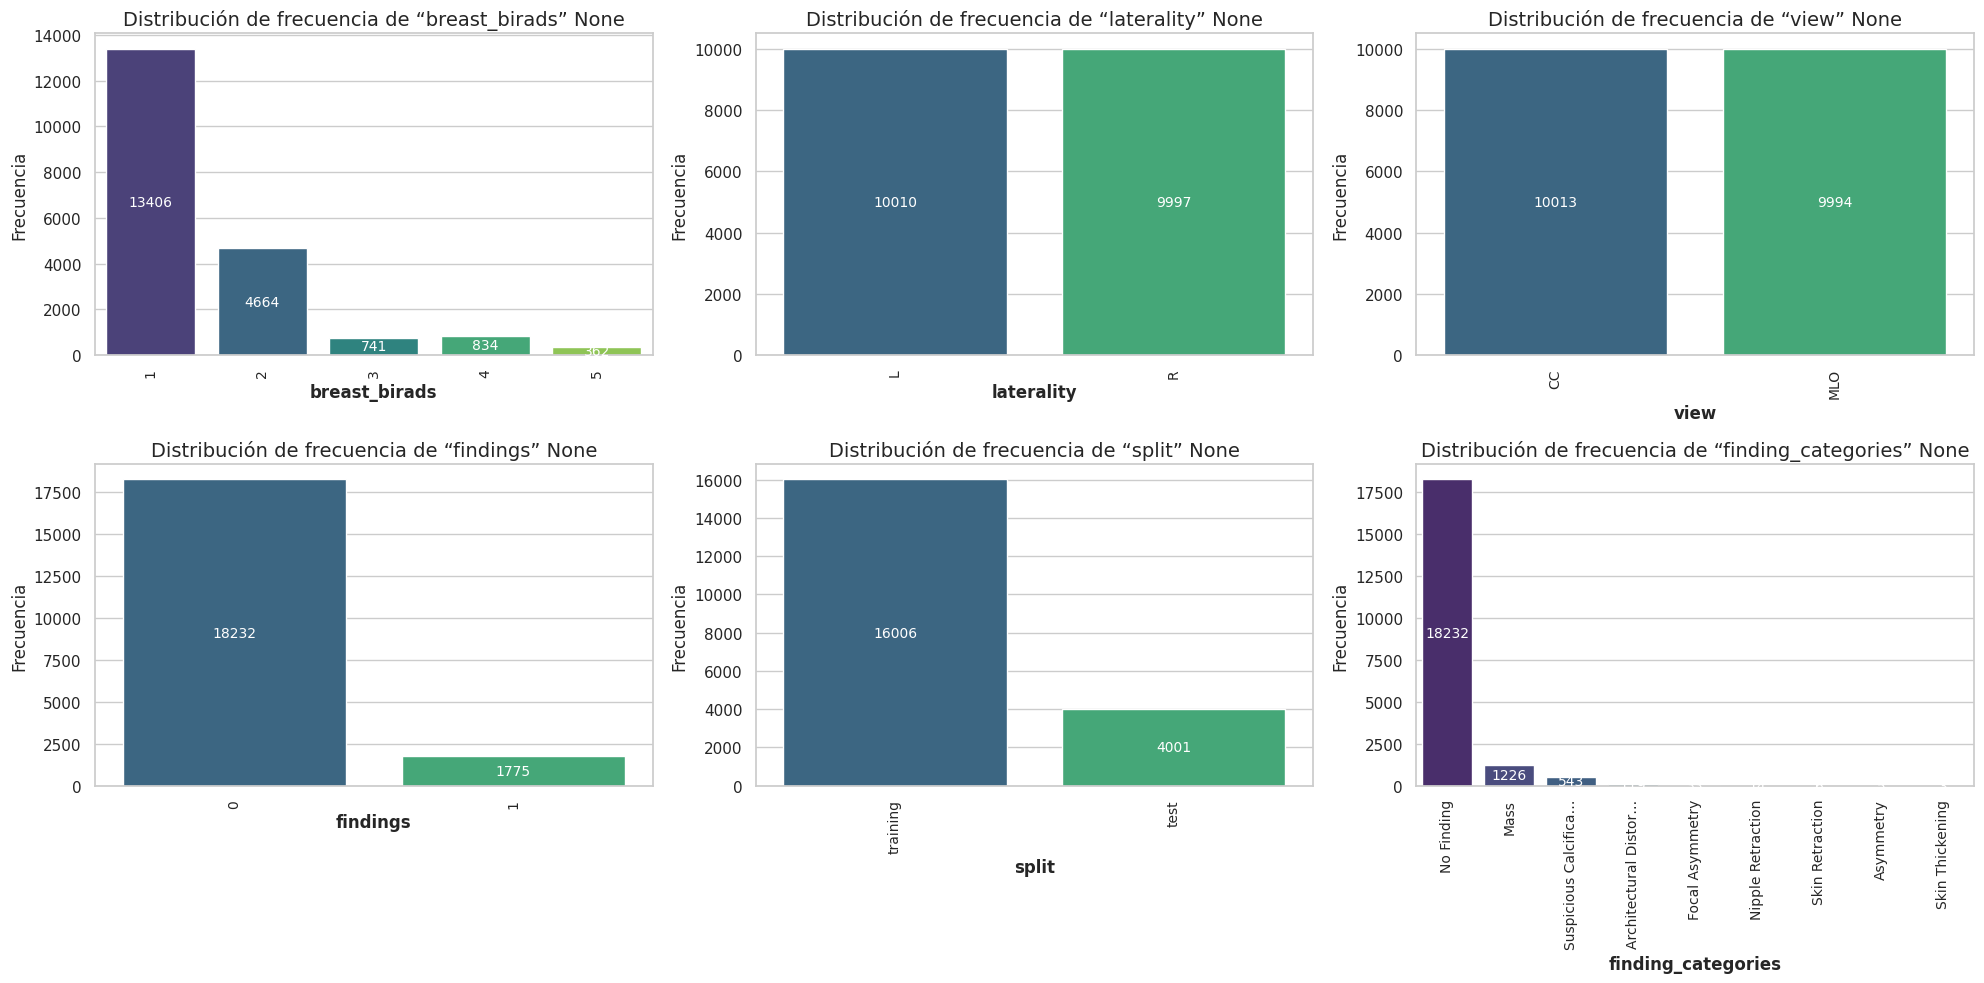

In [13]:
values = {'Mass', 'Suspicious Calcification', 'Architectural Distortion', 'No Finding'}
ds_clean = ds[
    (ds["finding_categories"].apply(lambda l: any(v in l for v in values)))
]
ds_clean.stats()

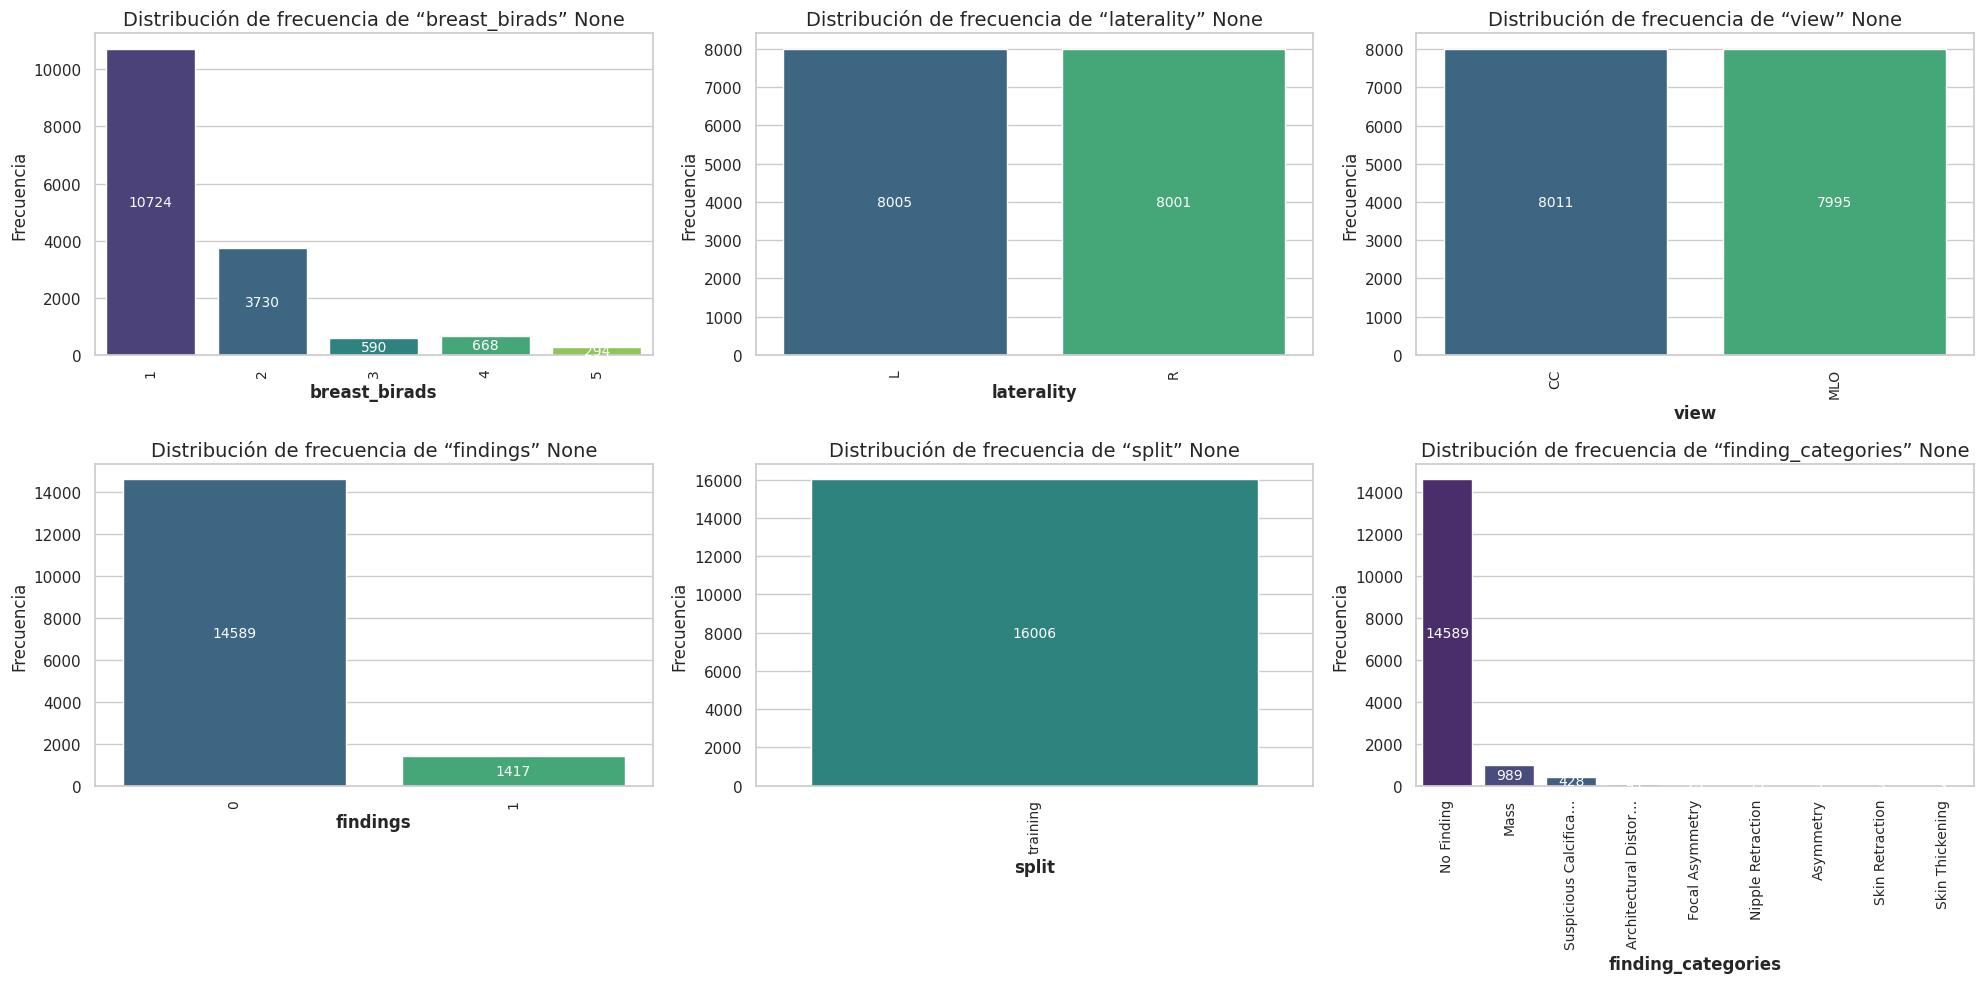

In [15]:
ds_clean_train = ds_clean[ds_clean["split"]=="training"]
ds_clean_train.stats()

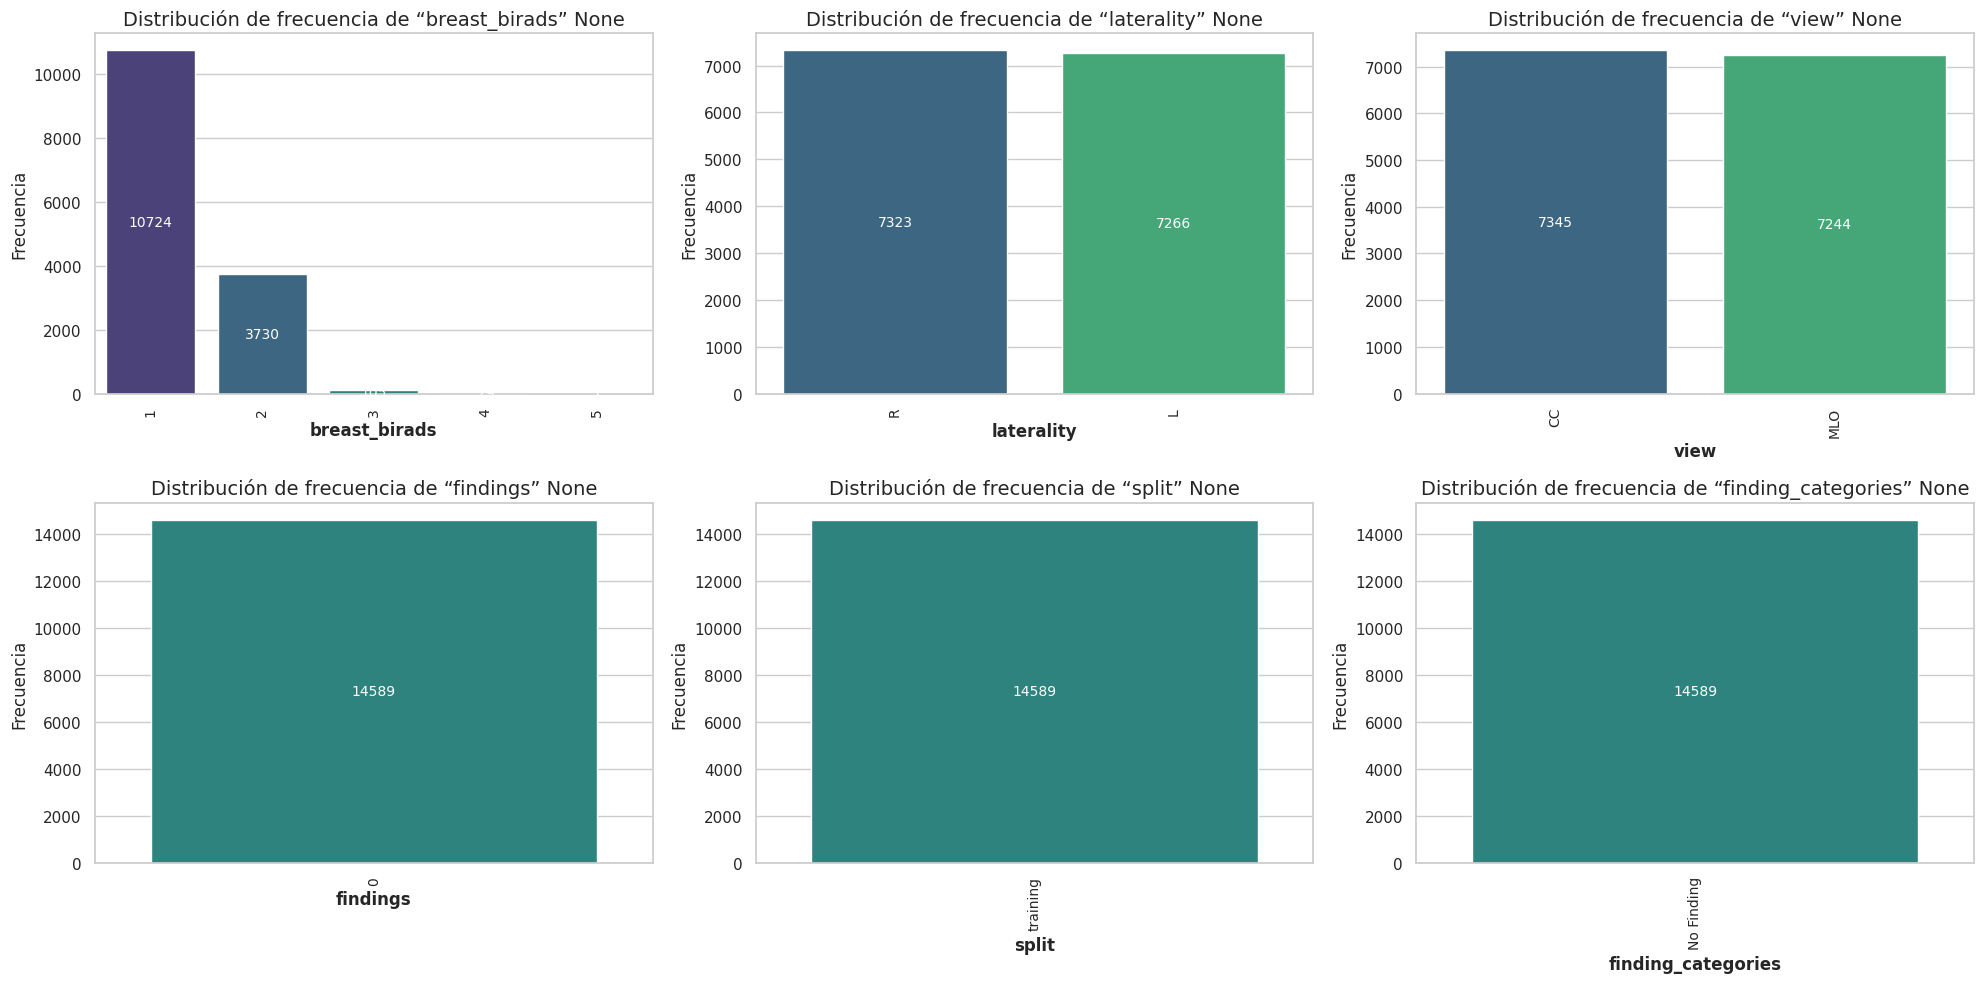

In [17]:
ds_clean_train_0 = ds_clean_train[ds_clean_train["findings"]==0] 
ds_clean_train_0.stats()

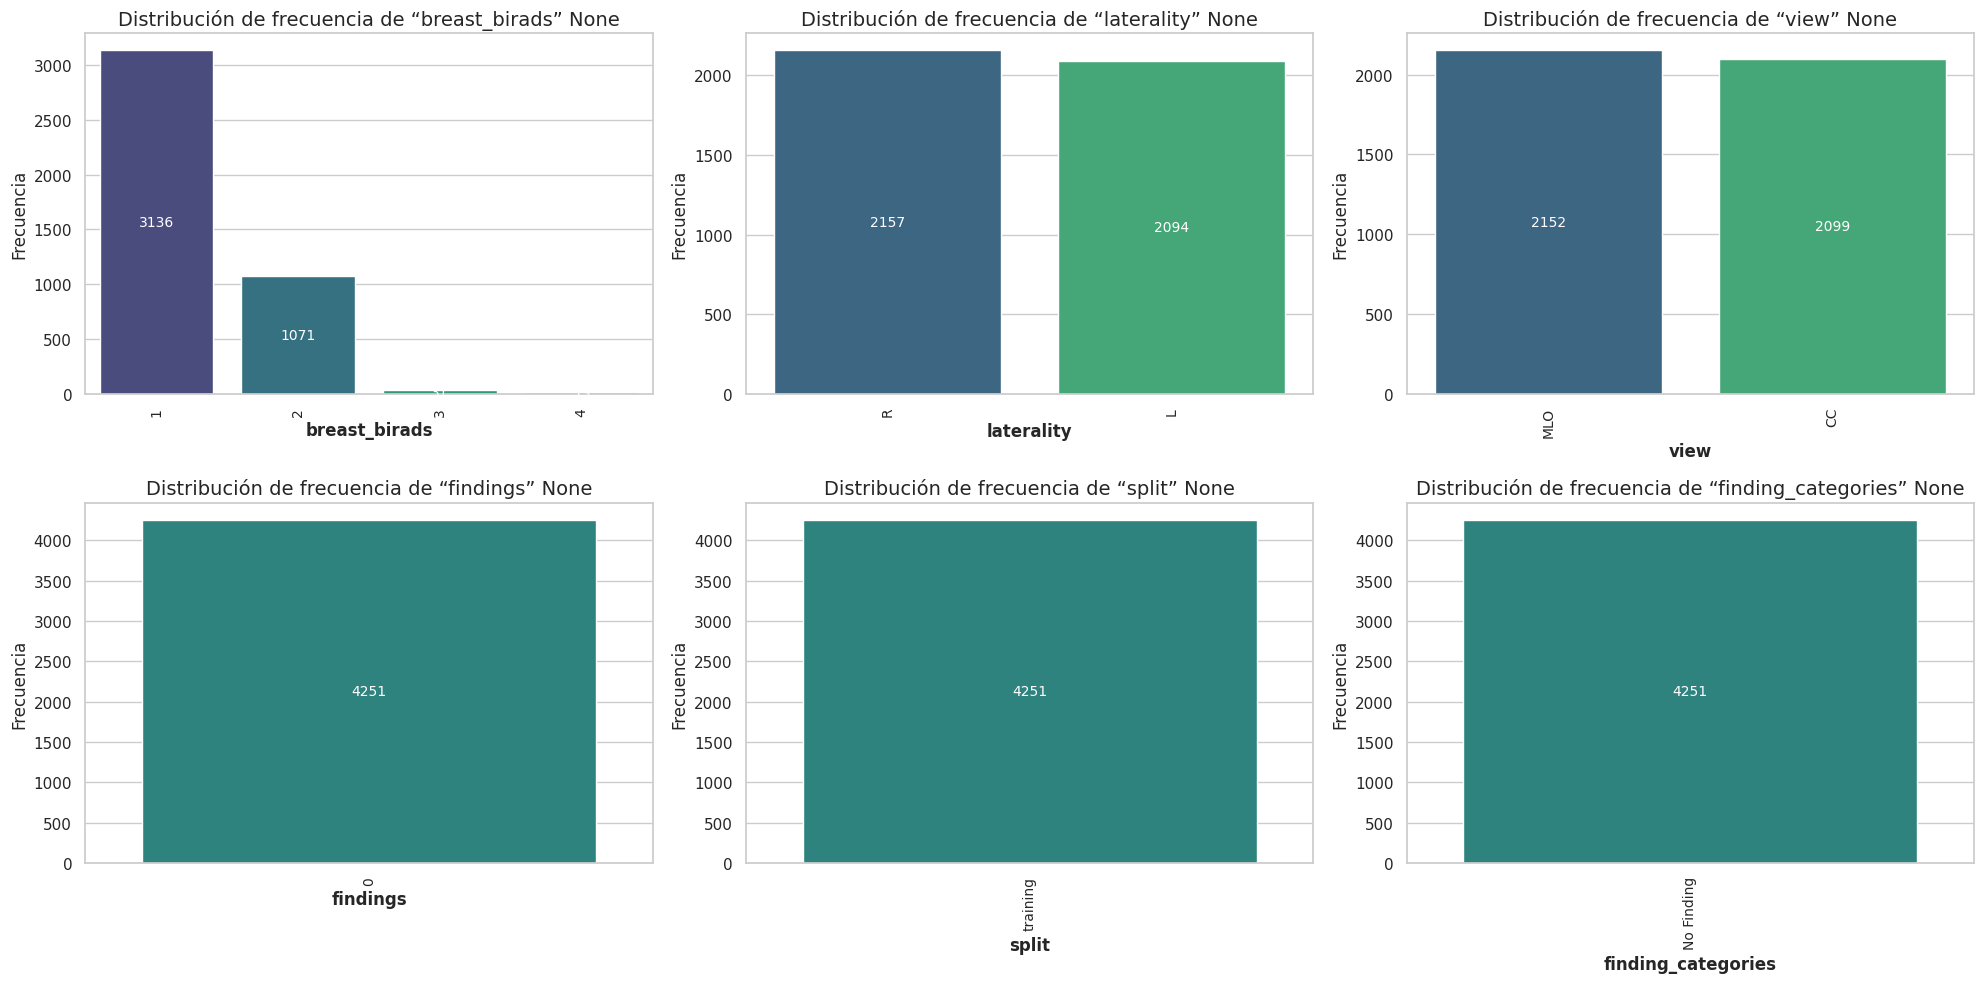

In [19]:
ds_clean_train_1_n = len(ds_clean_train_1)
ds_clean_train_0_sample = ds_clean_train_0.sample(n=3*ds_clean_train_1_n, random_state=42)
ds_clean_train_0_sample.stats()

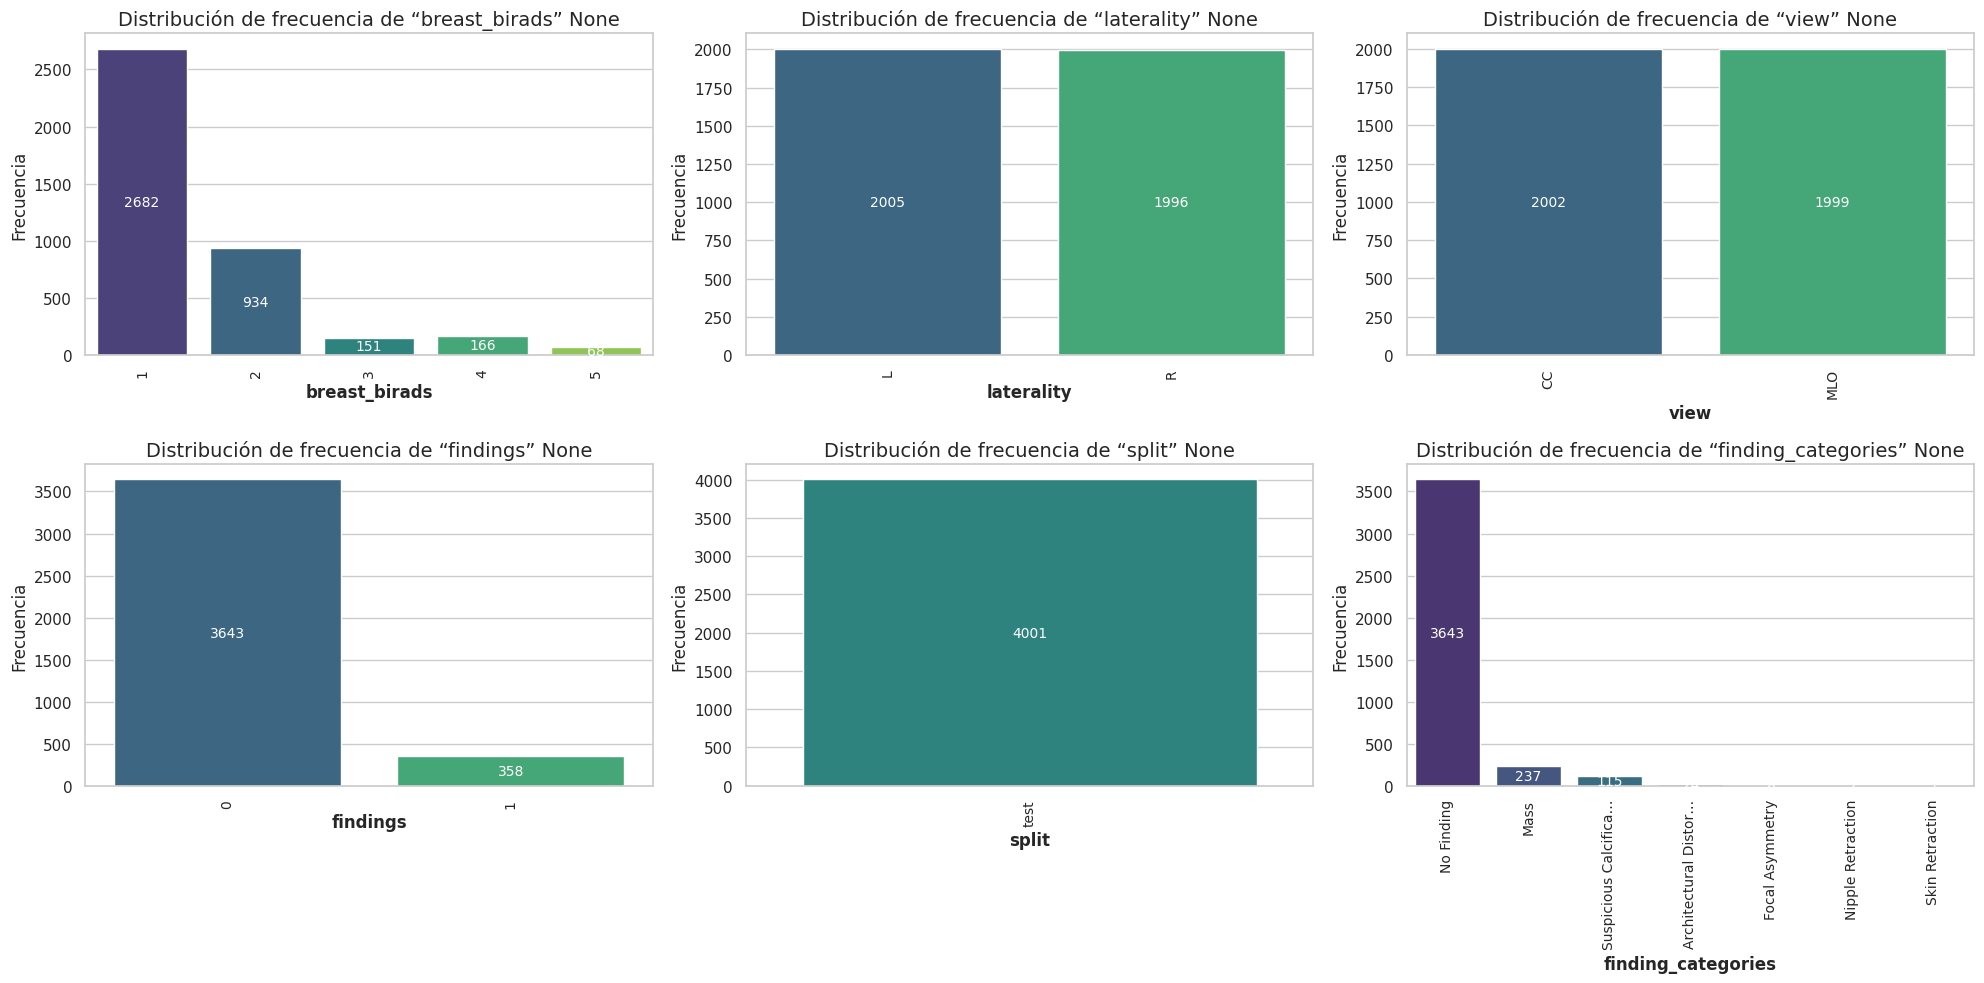

In [21]:
ds_clean_test = ds_clean[ds_clean["split"]=="test"]
ds_clean_test.stats()

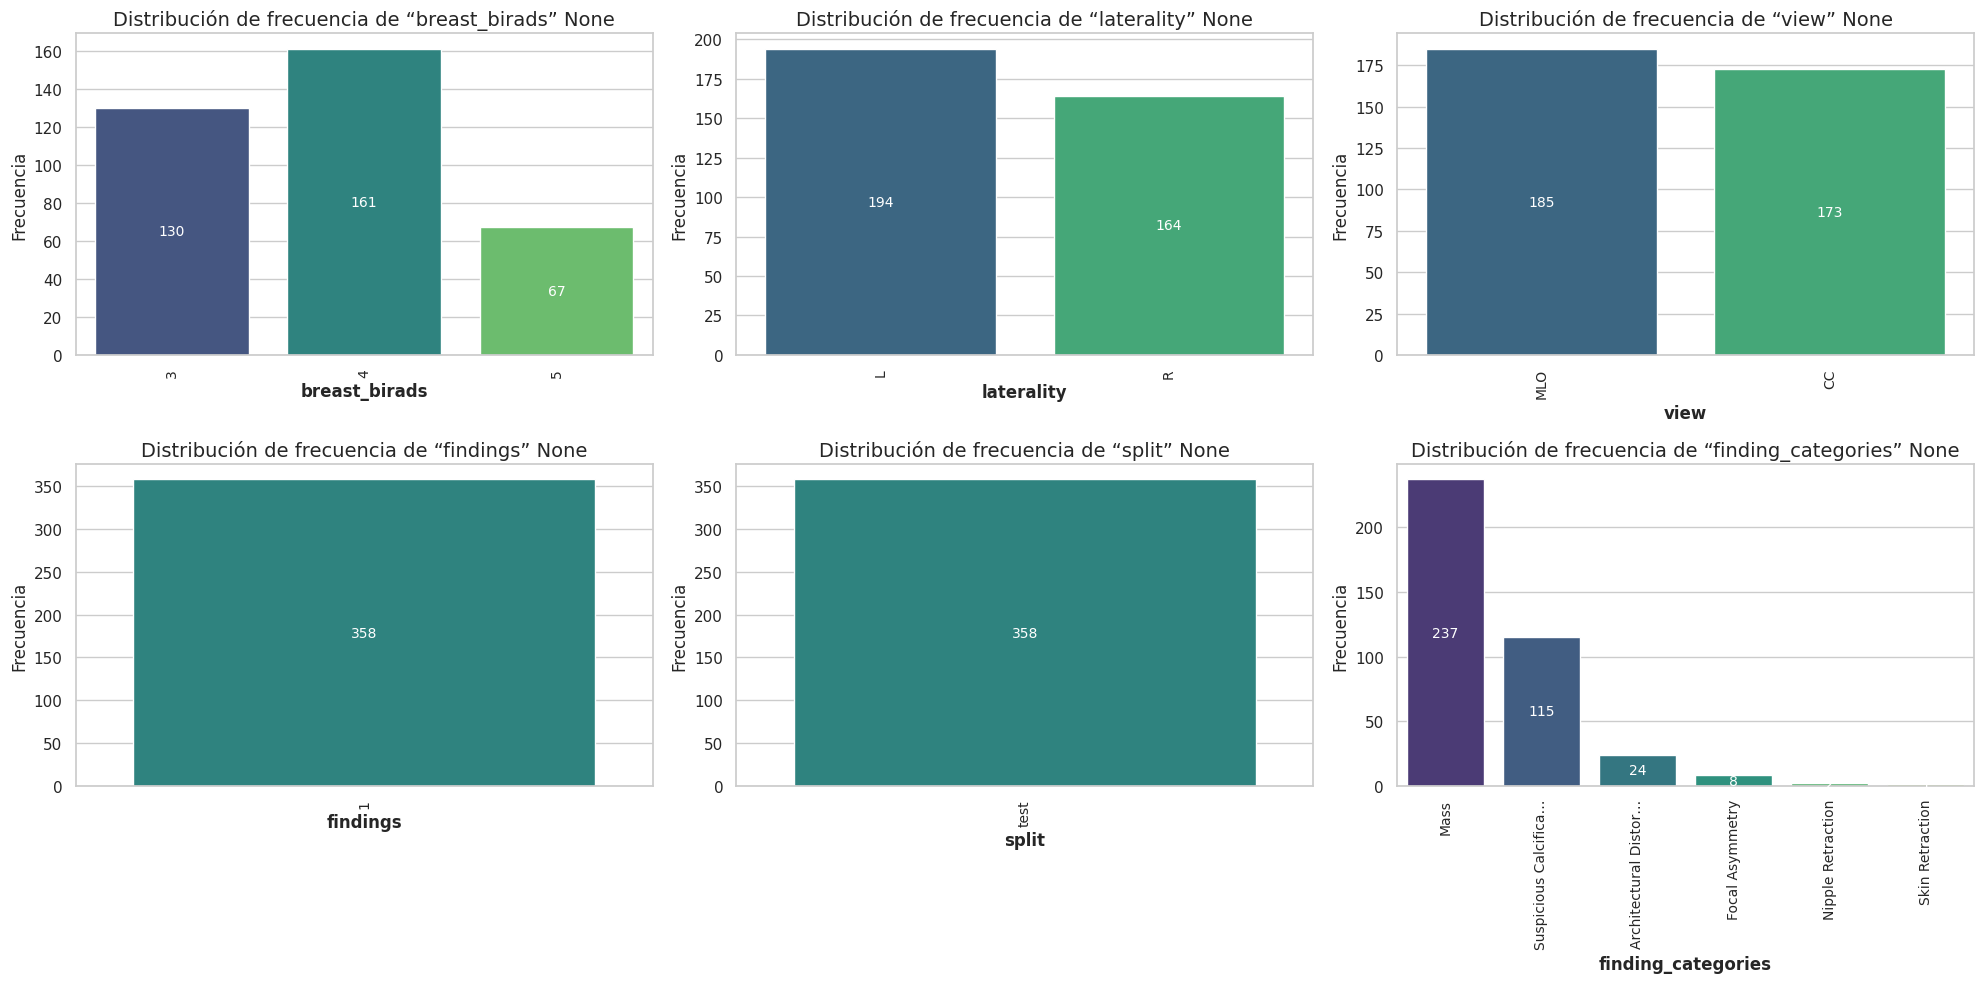

In [23]:
ds_clean_test_1 = ds_clean_test[ds_clean_test["findings"]==1] 
ds_clean_test_1.stats()

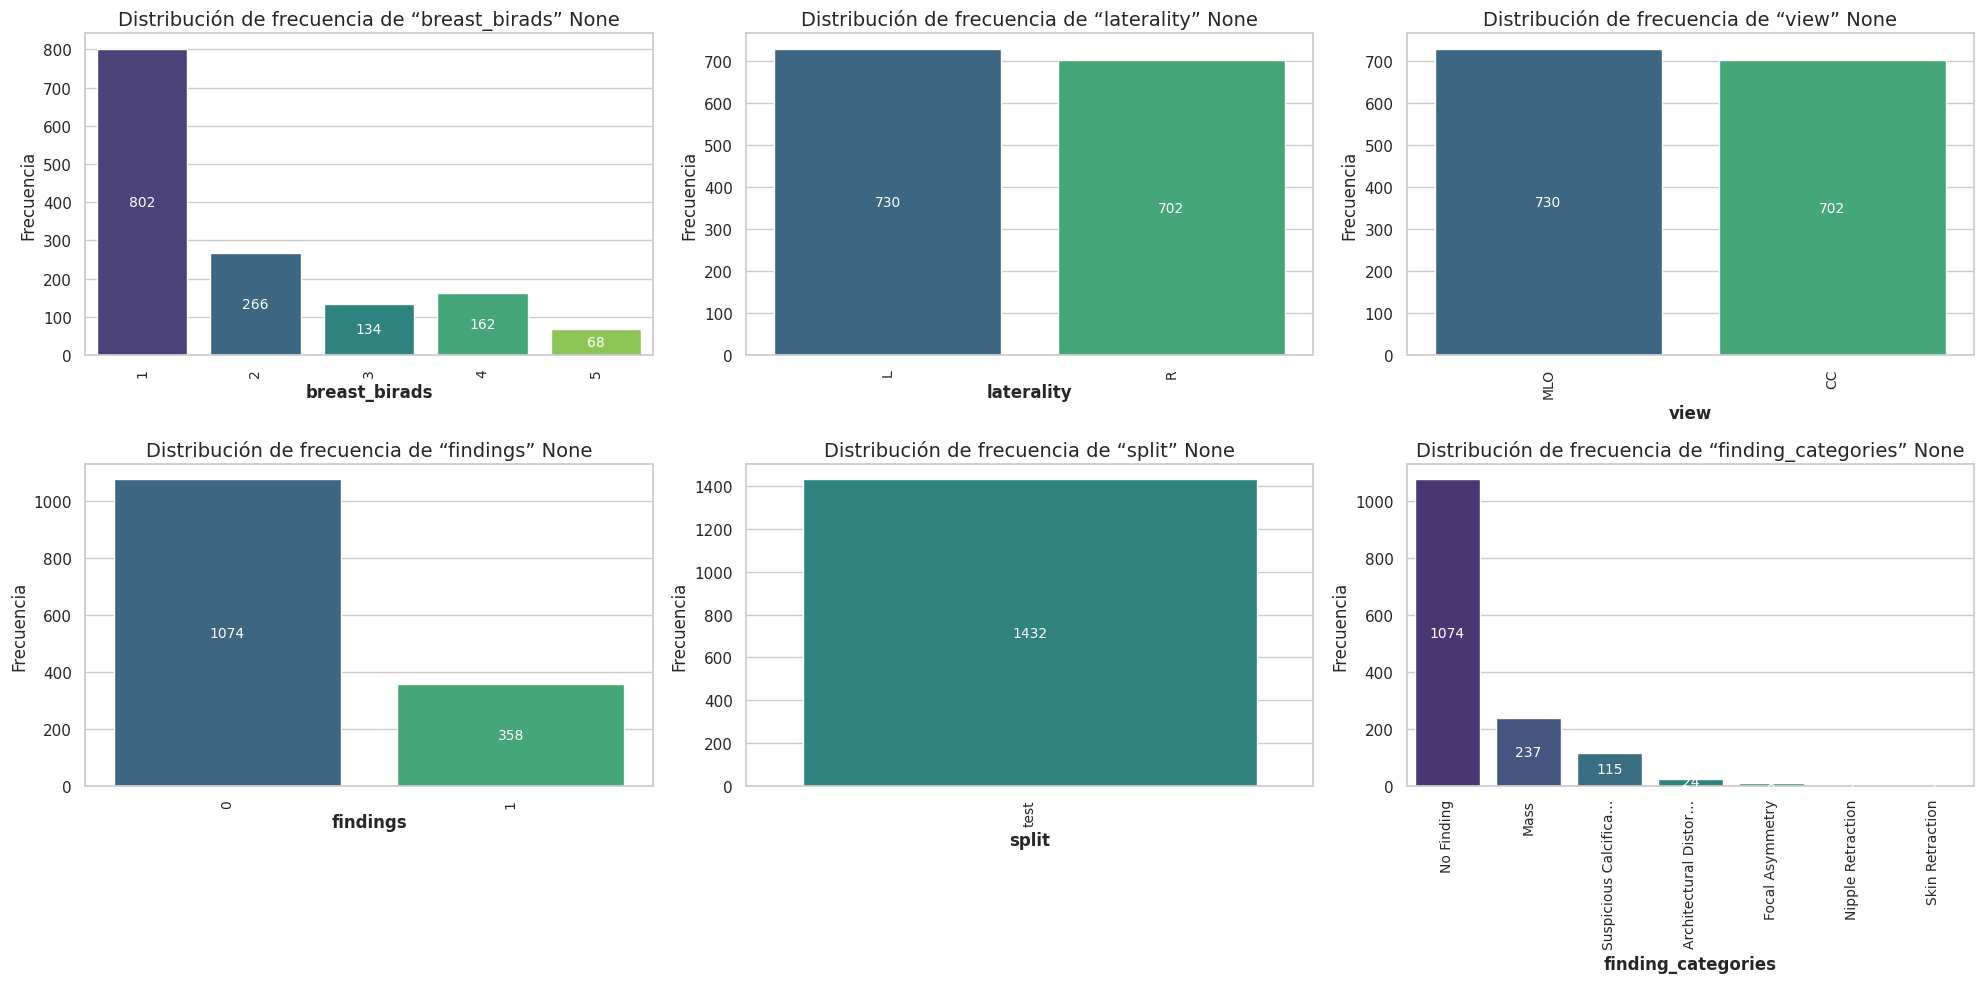

In [25]:
ds_test_ready = pd.concat([ds_clean_test_1, ds_clean_test_0_sample], ignore_index=True)
ds_test_ready.stats()

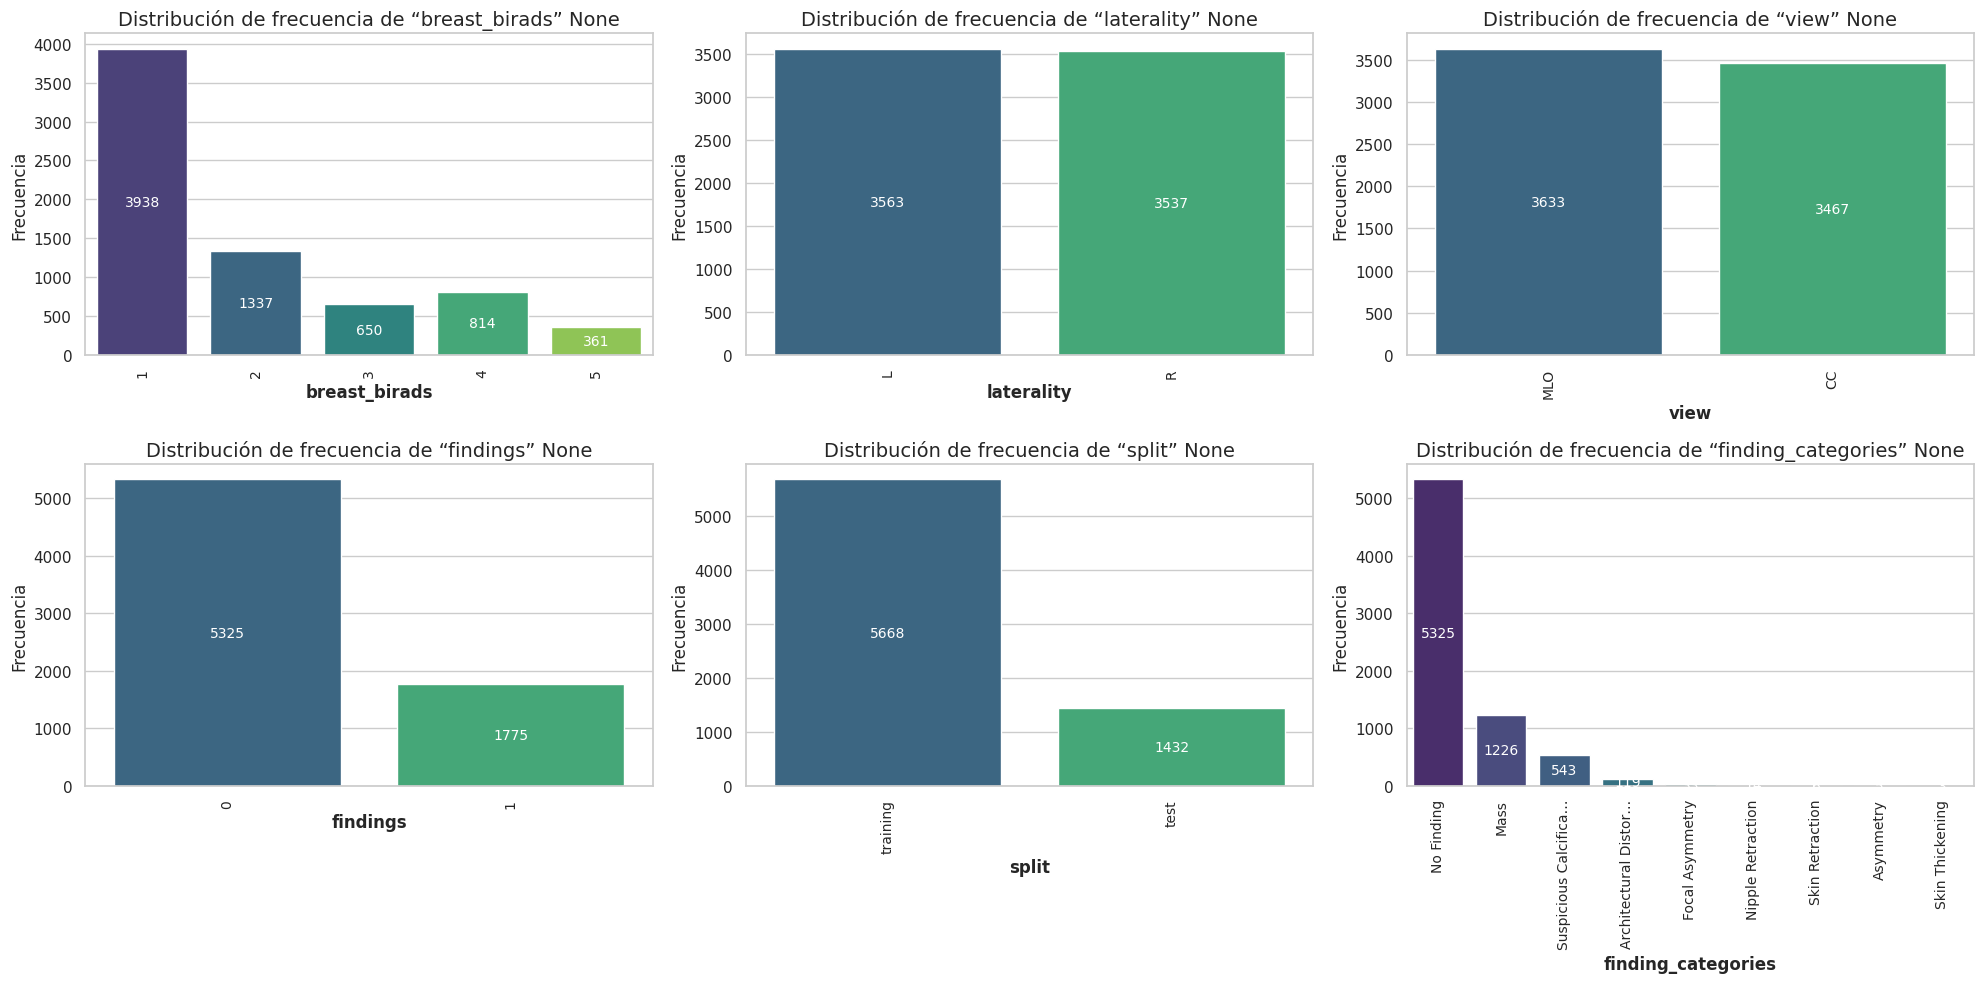

In [27]:
ds_ready = pd.concat([ds_train_ready, ds_test_ready], ignore_index=True)
ds_ready.stats()

In [29]:
ds_ready.to_csv("./ds_balanced.csv", index=False)


In [34]:
ds_ready

,laterality,view,breast_birads,finding_categories,finding_birads,split,xmin,ymin,xmax,ymax,path,findings
0,R,CC,4,[Mass],4,training,302.404100,985.773942,426.304376,1078.419728,utils/images_original/48575a27b7c992427041a82f...,1
1,R,MLO,4,[Mass],4,training,272.577325,743.812744,379.600308,812.095390,utils/images_original/48575a27b7c992427041a82f...,1
2,R,CC,4,[Architectural Distortion],4,training,331.732896,1078.254802,508.417507,1203.183844,utils/images_original/c3487424fee1bdd4515b72dc...,1
3,R,MLO,4,[Architectural Distortion],4,training,261.889965,1023.473918,398.125138,1091.223916,utils/images_original/c3487424fee1bdd4515b72dc...,1
4,L,CC,4,"[Nipple Retraction, Mass]",4,training,607.868846,700.577727,840.541260,951.560194,utils/images_original/7c51789da6c462e55bcb95c2...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7095,R,MLO,1,[No Finding],<NA>,test,NaN,NaN,NaN,NaN,utils/images_original/436d8bc6249a84f919004ccb...,0
7096,R,MLO,1,[No Finding],<NA>,test,NaN,NaN,NaN,NaN,utils/images_original/cfac0d62a935de7dfd7df694...,0
7097,R,MLO,2,[No Finding],<NA>,test,NaN,NaN,NaN,NaN,utils/images_original/c8a495687fe74f6aa477d0bf...,0
7098,L,MLO,1,[No Finding],<NA>,test,NaN,NaN,NaN,NaN,utils/images_original/9b7e001b3af23c0daddccb62...,0
